In [522]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.neural_network import MLPRegressor

%matplotlib inline

# Loading the dataset

In [583]:
data = pd.read_csv('Annual_Average_Daily_Traffic__AADT___Beginning_1977.csv')
data.head()

,Year,Station ID,County,Signing,State Route,County Road,Road Name,Beginning Description,Ending Description,Municipality,Length,Functional Class,Ramp,Bridge,Railroad Crossing,One Way,Count
0,2019,10001,Bronx,Interstate,95,NaN,Alexander Hamil,NY/Bronx Co Line,I-87 MAJ DEEGAN EXP UNDER,Bronx,7,11,NaN,Y,NaN,NaN,81839.0
1,2019,10002,Bronx,Interstate,95,NaN,Cross Bronx Exp,I-87 MAJ DEEGAN EXP UNDER,MACOMBS RD OVER,Bronx,51,11,NaN,Y,NaN,NaN,92512.0
2,2019,10003,Bronx,Interstate,95,NaN,Cross Bronx Exp,MACOMBS RD OVER,END I-95/US1 OLAP WEBSTER AV,Bronx,63,11,NaN,NaN,NaN,NaN,140871.0
3,2019,10004,Bronx,US,1,NaN,WEBSTER AVE,END I-95/US1 OLAP WEBSTER AV,E FORDHAM RD,Bronx,151,14,NaN,NaN,NaN,NaN,15198.0
4,2019,10005,Bronx,US,1,NaN,E FORDHAM RD,E FORDHAM RD,RT 907H BRONX RIVER PKWY SOU,Bronx,112,14,NaN,Y,NaN,NaN,32254.0


In [18]:
data.shape

(2593803, 17)

 Original dataset has 2593803 entries with 17 variables

In [6]:
data.describe

<bound method NDFrame.describe of          Year  Station ID County     Signing State Route County Road  \
0        2019       10001  Bronx  Interstate          95         NaN   
1        2019       10002  Bronx  Interstate          95         NaN   
2        2019       10003  Bronx  Interstate          95         NaN   
3        2019       10004  Bronx          US           1         NaN   
4        2019       10005  Bronx          US           1         NaN   
...       ...         ...    ...         ...         ...         ...   
2593798  1977      978036  Tioga         NaN         NaN        CR17   
2593799  1977      978037  Tioga         NaN         NaN         NaN   
2593800  1977      978516  Tioga         NaN         NaN        CR25   
2593801  1977      978534  Tioga         NaN         NaN        CR43   
2593802  1977      978608  Tioga         NaN         NaN         CR7   

               Road Name         Beginning Description  \
0        Alexander Hamil              NY/Br

In [14]:
data.isnull().sum(axis=0)
# data.isnull().sum()

Year                           0
Station ID                     0
County                        43
Signing                  2238365
State Route              2192140
County Road              2094100
Road Name                 252066
Beginning Description       8557
Ending Description         13674
Municipality               30573
Length                         0
Functional Class               0
Ramp                     2376653
Bridge                   1977957
Railroad Crossing        2481014
One Way                  2234624
Count                    2273761
dtype: int64

In [50]:
## checking the quantity of missing values before year 2000 to compare with the overall counts
data[data['Year'] < 2000].isnull().sum()

Year                           0
Station ID                     0
County                        23
Signing                  1197265
State Route              1172540
County Road              1120100
Road Name                 134826
Beginning Description       4577
Ending Description          7314
Municipality               16353
Length                         0
Functional Class               0
Ramp                     1271233
Bridge                   1057977
Railroad Crossing        1327054
One Way                  1195264
Count                    1302767
dtype: int64

---

We can observe that there is a lot of missing data of almost all the variables. And from the above describe, we can see that missing data belongs to the very beginning year(s) of data collection (like more than half of the missing data occurred before the year 2000) and also the original dataset has 2593803 entries which is overwhelming for this assignment.

So, for this assignment a subset of the original dataset which belong to the year 2019 was picked


---

# Part 1:

## Extracting the required dataset

In [64]:
data_2019 = data[data['Year'] == 2019]
data_2019.head()

,Year,Station ID,County,Signing,State Route,County Road,Road Name,Beginning Description,Ending Description,Municipality,Length,Functional Class,Ramp,Bridge,Railroad Crossing,One Way,Count
0,2019,10001,Bronx,Interstate,95,NaN,Alexander Hamil,NY/Bronx Co Line,I-87 MAJ DEEGAN EXP UNDER,Bronx,7,11,NaN,Y,NaN,NaN,81839.0
1,2019,10002,Bronx,Interstate,95,NaN,Cross Bronx Exp,I-87 MAJ DEEGAN EXP UNDER,MACOMBS RD OVER,Bronx,51,11,NaN,Y,NaN,NaN,92512.0
2,2019,10003,Bronx,Interstate,95,NaN,Cross Bronx Exp,MACOMBS RD OVER,END I-95/US1 OLAP WEBSTER AV,Bronx,63,11,NaN,NaN,NaN,NaN,140871.0
3,2019,10004,Bronx,US,1,NaN,WEBSTER AVE,END I-95/US1 OLAP WEBSTER AV,E FORDHAM RD,Bronx,151,14,NaN,NaN,NaN,NaN,15198.0
4,2019,10005,Bronx,US,1,NaN,E FORDHAM RD,E FORDHAM RD,RT 907H BRONX RIVER PKWY SOU,Bronx,112,14,NaN,Y,NaN,NaN,32254.0


# 1. Dataset has 60321 entries with 17 variables

In [27]:
data_2019.shape

(60321, 17)

# 2. Types of data included :

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593803 entries, 0 to 2593802
Data columns (total 17 columns):
Year                     int64
Station ID               int64
County                   object
Signing                  object
State Route              object
County Road              object
Road Name                object
Beginning Description    object
Ending Description       object
Municipality             object
Length                   int64
Functional Class         int64
Ramp                     object
Bridge                   object
Railroad Crossing        object
One Way                  object
Count                    float64
dtypes: float64(1), int64(4), object(12)
memory usage: 336.4+ MB


The description of each column can be found at https://data.ny.gov/Government-Finance/Annual-Population-Estimates-for-New-York-State-and/krt9-ym2k

# 3. Looking for missing data :

In [24]:
data_2019.isnull().sum(axis=0)

Year                         0
Station ID                   0
County                       1
Signing                  52055
State Route              50980
County Road              48700
Road Name                 5862
Beginning Description      199
Ending Description         318
Municipality               711
Length                       0
Functional Class             0
Ramp                     55271
Bridge                   45999
Railroad Crossing        57698
One Way                  51968
Count                        0
dtype: int64

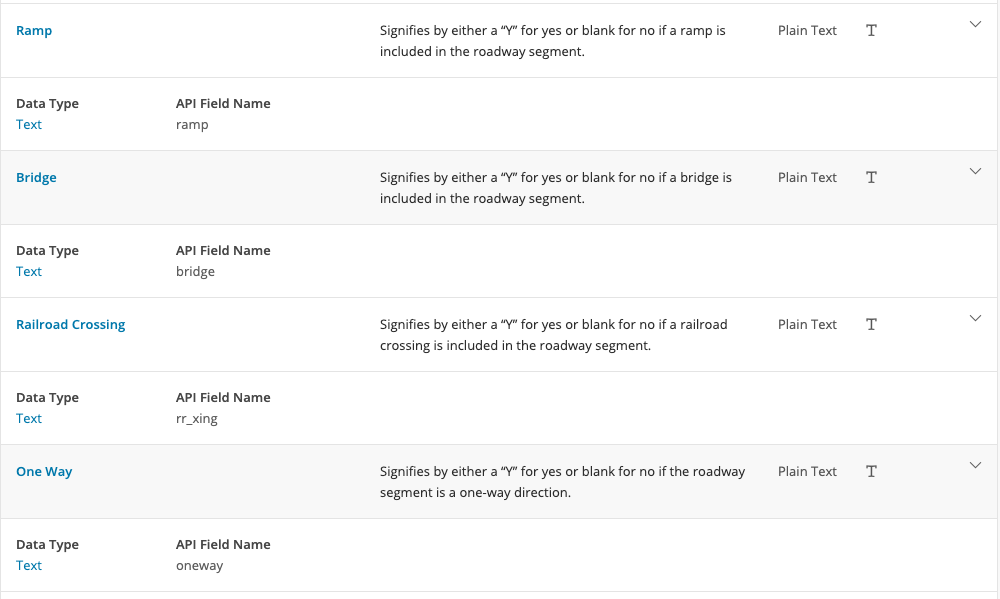

---

Here columns like Ramp, Bridge, Railroad Crossing, One way has a lot of missing values but from the metadata/column description we can know that these columns have possibly two values, one of them is 'Y' and the other was just left as null (which got reflected as a missing value). So Missing values of above four columns are not considered.


---

# 4. Main statistics about the entries of the dataset :

In [55]:
data_2019.describe()

,Year,Station ID,Length,Functional Class,Count
count,60321.0,60321.000000,60321.000000,60321.000000,60321.000000
mean,2019.0,438404.470218,86.561761,14.100612,5432.958157
std,0.0,308530.825040,124.785483,4.592381,13241.867994
min,2019.0,10001.000000,1.000000,1.000000,0.000000
25%,2019.0,115248.000000,18.000000,9.000000,290.000000
50%,2019.0,440047.000000,42.000000,16.000000,1468.000000
75%,2019.0,726064.000000,101.000000,19.000000,5520.000000
max,2019.0,978608.000000,1856.000000,19.000000,283686.000000


# 5. Visualization of the extracted dataset

Text(0, 0.5, 'Frequency')

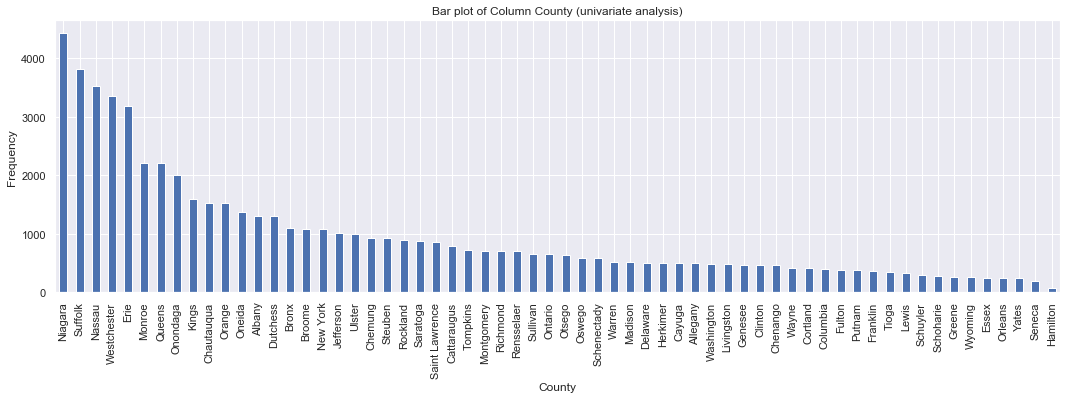

In [537]:
data_2019['County'].value_counts().plot.bar(figsize=(18,5))
plt.title('Bar plot of Column County (univariate analysis)')
plt.xlabel('County')
plt.ylabel('Frequency')

## We can see that Niagara county has comparatively more traffic than the rest.
---

Text(0.5, 1.0, 'Bar plot of Column Signing (univariate analysis)')

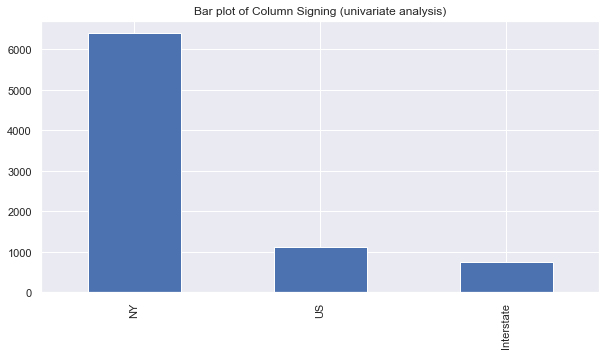

In [530]:
data_2019['Signing'].value_counts().plot.bar(figsize=(10,5))
plt.title('Bar plot of Column Signing (univariate analysis)')

---

We can observe that New York State Highway designation assigned at the State level is comparatively very large than US and interstate designated highway system. But according to the metadata null's (which are 52055) correspond to local town, municipality or city roadway. So local roadway is much larger than even NY highway.

---

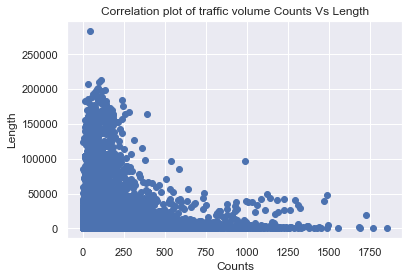

In [532]:
fig, axes = plt.subplots()

axes.scatter(data_2019['Length'], data_2019['Count'])
plt.title('Correlation plot of traffic volume Counts Vs Length')
plt.xlabel('Counts')
plt.ylabel('Length')
plt.show()


---

This implies that roads with shorter lengths are more likely to have heavy volumes of traffic.

---

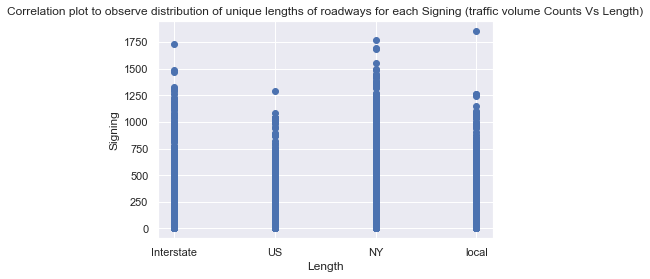

In [535]:
fig, axes = plt.subplots()

axes.scatter(data_2019['Signing'].fillna('local'), data_2019['Length'])
plt.title('Correlation plot to observe distribution of unique lengths of roadways for each Signing (traffic volume Counts Vs Length)')
plt.xlabel('Length')
plt.ylabel('Signing')
plt.show()



---

We can observe that length of road for Interstate and NY highways are a little higher than that of US highways and local roadways

---

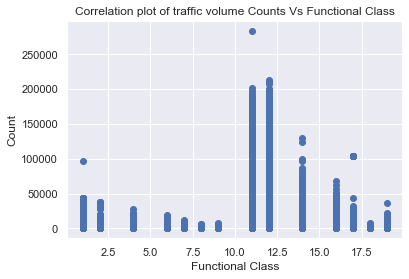

In [536]:
fig, axes = plt.subplots()

axes.scatter(data_2019['Functional Class'], data_2019['Count'])
plt.title('Correlation plot of traffic volume Counts Vs Functional Class')
plt.xlabel('Functional Class')
plt.ylabel('Count')

plt.show()


Text(0, 0.5, 'Frequency')

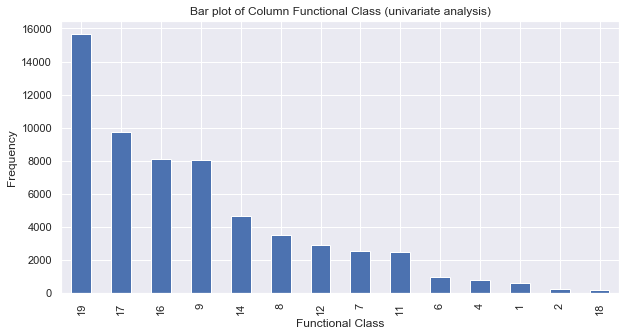

In [538]:
data_2019['Functional Class'].value_counts().plot.bar(figsize=(10,5))
plt.title('Bar plot of Column Functional Class (univariate analysis)')
plt.xlabel('Functional Class')
plt.ylabel('Frequency')

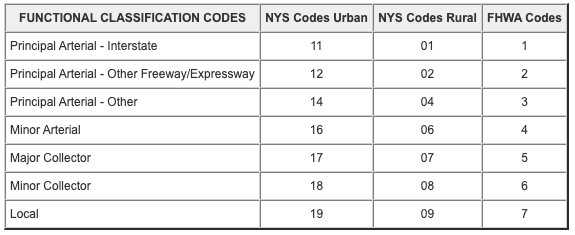

---


From the above univariate analysis of column Functional Class and metadata about the column, we can observe that Local NYS Codes Urban has comparatively high volumes of traffic. PFB the link for further details.
https://www.dot.ny.gov/gisapps/functional-class-maps

---

# Part 2:

# 1. Choose the features and targets in the dataset :

---

From the observations made out of data analysis and visualization and also taking the metadata into consideration, Below are the features and targets in the dataset:

---
Features:
1. County
2. Station ID
3. Signing
4. Municipality
5. Length
6. Functional Class
7. Ramp
8. Bridge
9. Railroad Crossing
10. One Way
---
Target/Response variable:

Count (Annual Average Daily Traffic volume value)

---
---

# 2. Preprocess the dataset for training :

## Dropping the features which are not neccessary for prediction

In [584]:
refined_data_2019 = data_2019.drop(columns=['Year', 'County Road', 'Road Name', 'State Route', 'Beginning Description', 'Ending Description'])
refined_data_2019

,Station ID,County,Signing,Municipality,Length,Functional Class,Ramp,Bridge,Railroad Crossing,One Way,Count
0,10001,Bronx,Interstate,Bronx,7,11,NaN,Y,NaN,NaN,81839.0
1,10002,Bronx,Interstate,Bronx,51,11,NaN,Y,NaN,NaN,92512.0
2,10003,Bronx,Interstate,Bronx,63,11,NaN,NaN,NaN,NaN,140871.0
3,10004,Bronx,US,Bronx,151,14,NaN,NaN,NaN,NaN,15198.0
4,10005,Bronx,US,Bronx,112,14,NaN,Y,NaN,NaN,32254.0
...,...,...,...,...,...,...,...,...,...,...,...
60316,978036,Tioga,NaN,Nichols,77,19,NaN,NaN,NaN,NaN,518.0
60317,978037,Tioga,NaN,Barton,33,17,NaN,NaN,NaN,NaN,1679.0
60318,978516,Tioga,NaN,Owego,56,8,NaN,NaN,NaN,NaN,306.0
60319,978534,Tioga,NaN,Tioga,10,19,NaN,NaN,NaN,NaN,272.0


## Replacing null with appropriate label for columns Ramp, Bridge, Railroad Crossing, One way and Signing

In [585]:
refined_data_2019['Ramp'].fillna('N', inplace = True)
refined_data_2019['Bridge'].fillna('N', inplace = True)
refined_data_2019['Railroad Crossing'].fillna('N', inplace = True)
refined_data_2019['One Way'].fillna('N', inplace = True)
refined_data_2019['Signing'].fillna('Local', inplace = True)

## Below we can see columns with null values

In [586]:
refined_data_2019.isnull().sum()

Station ID             0
County                 1
Signing                0
Municipality         711
Length                 0
Functional Class       0
Ramp                   0
Bridge                 0
Railroad Crossing      0
One Way                0
Count                  0
dtype: int64

## It is computationally wise to remove the one row where county name is missing rather than meaningfully replacing it

In [587]:
index = refined_data_2019[refined_data_2019['County'].isnull()].index
refined_data_2019.drop(index, inplace = True)
refined_data_2019

,Station ID,County,Signing,Municipality,Length,Functional Class,Ramp,Bridge,Railroad Crossing,One Way,Count
0,10001,Bronx,Interstate,Bronx,7,11,N,Y,N,N,81839.0
1,10002,Bronx,Interstate,Bronx,51,11,N,Y,N,N,92512.0
2,10003,Bronx,Interstate,Bronx,63,11,N,N,N,N,140871.0
3,10004,Bronx,US,Bronx,151,14,N,N,N,N,15198.0
4,10005,Bronx,US,Bronx,112,14,N,Y,N,N,32254.0
...,...,...,...,...,...,...,...,...,...,...,...
60316,978036,Tioga,Local,Nichols,77,19,N,N,N,N,518.0
60317,978037,Tioga,Local,Barton,33,17,N,N,N,N,1679.0
60318,978516,Tioga,Local,Owego,56,8,N,N,N,N,306.0
60319,978534,Tioga,Local,Tioga,10,19,N,N,N,N,272.0


In [588]:
refined_data_2019.isnull().sum()

Station ID             0
County                 0
Signing                0
Municipality         711
Length                 0
Functional Class       0
Ramp                   0
Bridge                 0
Railroad Crossing      0
One Way                0
Count                  0
dtype: int64

## Now we have to handle missing values of column Municipality

In [589]:
## looking at the entries which have municipality as null
refined_data_2019[refined_data_2019['Municipality'].isnull()]

,Station ID,County,Signing,Municipality,Length,Functional Class,Ramp,Bridge,Railroad Crossing,One Way,Count
9502,60001,Richmond,Interstate,NaN,180,11,N,Y,N,N,85999.0
9503,60002,Richmond,Interstate,NaN,24,11,N,Y,N,N,138424.0
9504,60003,Richmond,Interstate,NaN,16,11,N,Y,N,N,140484.0
9505,60004,Richmond,Interstate,NaN,70,11,N,Y,N,N,153026.0
9506,60005,Richmond,Interstate,NaN,188,11,N,Y,N,N,158756.0
...,...,...,...,...,...,...,...,...,...,...,...
10208,67001,Richmond,Local,NaN,32,19,N,N,Y,N,11463.0
10209,68000,Richmond,Local,NaN,67,16,N,N,N,N,13211.0
31703,510005,Cattaraugus,NY,NaN,24,4,N,Y,N,N,15499.0
31704,510005,Cattaraugus,NY,NaN,24,4,N,Y,N,N,15499.0


In [590]:
refined_data_2019[refined_data_2019['Municipality'].isnull()]['County'].value_counts()

Richmond       708
Cattaraugus      3
Name: County, dtype: int64

---

We can see that all of the null values correspond to only two counties. We can further analyse and impute the missing 
values efficiently.

---

In [591]:
refined_data_2019[(refined_data_2019['County'] == 'Richmond') & (refined_data_2019['Municipality'].isnull())]['County'].value_counts()

Richmond    708
Name: County, dtype: int64

In [592]:
refined_data_2019[refined_data_2019['County'] == 'Richmond']['County'].value_counts()

Richmond    708
Name: County, dtype: int64

---
Every Municipality value of County 'Richmond' is null. So, we can assign all these entries with a unique municipality name

---

In [593]:
refined_data_2019[refined_data_2019['Municipality'] == 'Richmond'].head()

,Station ID,County,Signing,Municipality,Length,Functional Class,Ramp,Bridge,Railroad Crossing,One Way,Count
30203,440243,Ontario,US,Richmond,85,7,N,Y,N,N,5838.0
30221,440511,Ontario,US,Richmond,367,7,N,N,N,N,1837.0
30390,441262,Ontario,Local,Richmond,394,9,N,N,N,N,837.0
30490,442202,Ontario,Local,Richmond,116,9,N,N,N,N,155.0
30500,442212,Ontario,Local,Richmond,98,9,N,N,N,N,57.0


And we can not assign the name Richmond to the municipality of the county Richmond as it already exist for another county. So, I am assigning a name which doesn't exist in the dataset (like 'Rich')

In [594]:
refined_data_2019.loc[refined_data_2019.County == 'Richmond','Municipality'] = 'Rich'

In [667]:
print("Null values in the data :\n", refined_data_2019.isnull().sum())
refined_data_2019[refined_data_2019['Municipality'].isnull()]['County'].value_counts()

Null values in the data :
 Station ID           0
County               0
Signing              0
Municipality         0
Length               0
Functional Class     0
Ramp                 0
Bridge               0
Railroad Crossing    0
One Way              0
Count                0
dtype: int64


Series([], Name: County, dtype: int64)

In [596]:
refined_data_2019[refined_data_2019['Municipality'].isnull()]

,Station ID,County,Signing,Municipality,Length,Functional Class,Ramp,Bridge,Railroad Crossing,One Way,Count
31703,510005,Cattaraugus,NY,NaN,24,4,N,Y,N,N,15499.0
31704,510005,Cattaraugus,NY,NaN,24,4,N,Y,N,N,15499.0
31705,510005,Cattaraugus,NY,NaN,24,4,N,Y,N,N,15499.0


---
These 3 rows with missing values can be ignored but here we can observe an intrested detail in the obtained missing values rows: all three entries have same values for every column in the missing data.
So, by searching for other rows with similar data in it. We can impute the missing values in it.

---

In [597]:
refined_data_2019[(refined_data_2019['County'] == 'Cattaraugus') & (refined_data_2019['Signing'] == 'NY') & (refined_data_2019['Station ID'] == 510005)]

,Station ID,County,Signing,Municipality,Length,Functional Class,Ramp,Bridge,Railroad Crossing,One Way,Count
31703,510005,Cattaraugus,NY,NaN,24,4,N,Y,N,N,15499.0
31704,510005,Cattaraugus,NY,NaN,24,4,N,Y,N,N,15499.0
31705,510005,Cattaraugus,NY,NaN,24,4,N,Y,N,N,15499.0
31706,510005,Cattaraugus,NY,Yorkshire,24,4,N,Y,N,N,15499.0


---
Missing value is 'Yorkshire'.

---

In [598]:
refined_data_2019['Municipality'].fillna('Yorkshire', inplace = True)

In [599]:
refined_data_2019.isnull().sum()

Station ID           0
County               0
Signing              0
Municipality         0
Length               0
Functional Class     0
Ramp                 0
Bridge               0
Railroad Crossing    0
One Way              0
Count                0
dtype: int64

---

Data has been cleaned and missing variables are filled.

---

## Splitting the data into test and train

In [486]:
refined_data_2019['Municipality'].value_counts()

Niagara Falls    3657
Queens           2211
Brooklyn         1593
Hempstead        1096
Bronx            1094
                 ... 
Centre Island       1
New Square          1
Brushton            1
Cold Brook          1
Clayville           1
Name: Municipality, Length: 1284, dtype: int64

In [487]:
index = refined_data_2019['Municipality'].value_counts()[refined_data_2019['Municipality'].value_counts() < 10].index
index

Index(['Bovina', 'Painted Post', 'Alma', 'Laurel Hollow', 'Head of the Harbor',
       'German', 'Thurman', 'Montague', 'Northville', 'Genesee Falls',
       ...
       'Grand View-on-Hudson', 'Deferiet', 'Belle Terre', 'Middleville',
       'Delanson', 'Centre Island', 'New Square', 'Brushton', 'Cold Brook',
       'Clayville'],
      dtype='object', length=265)

We can see that there are 651 unique values in 'Municipality' which have less than 20 individual entries. Splitting this will result in test data which is unreachable to the predictions of the trained model as the model which was trained will have no information about many of the labels in 'Municipality' column. 
So, to handle this case the entries with lesser unique values must be provided to training data rather than splitting.

In [488]:
refined_data_2019[refined_data_2019['Municipality'].isin(index)]

,Station ID,County,Signing,Municipality,Length,Functional Class,Ramp,Bridge,Railroad Crossing,One Way,Count
2741,30059,Nassau,NY,Oyster Bay Cove,171,14,N,N,N,N,17312.0
2744,30069,Nassau,NY,Bellerose,72,14,N,N,N,N,38230.0
2789,30225,Nassau,NY,Russell Gardens,88,14,N,N,N,N,26263.0
2797,30235,Nassau,NY,Oyster Bay Cove,148,14,N,N,N,N,17744.0
2798,30238,Nassau,NY,Laurel Hollow,78,14,N,Y,N,N,19662.0
...,...,...,...,...,...,...,...,...,...,...,...
60243,976604,Tioga,Local,Richford,396,7,N,Y,N,N,513.0
60287,977253,Tioga,Local,Richford,34,9,N,N,Y,N,45.0
60288,977259,Tioga,Local,Richford,3,9,N,N,N,N,111.0
60294,978010,Tioga,Local,Berkshire,215,8,N,N,N,N,554.0


In [502]:
biased_data = refined_data_2019[refined_data_2019['Municipality'].isin(index)]

In [503]:
to_be_split = refined_data_2019[~refined_data_2019['Municipality'].isin(index)]

In [504]:
X = to_be_split.drop(columns=['Count'])
Y = to_be_split['Count']

In [505]:
biased_data_x = biased_data.drop(columns=['Count'])
biased_data_y = biased_data['Count']

In [506]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.82, random_state=1)

In [507]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(48232, 10)
(10588, 10)
(48232,)
(10588,)


In [510]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48232 entries, 49290 to 33910
Data columns (total 10 columns):
Station ID           48232 non-null int64
County               48232 non-null object
Signing              48232 non-null object
Municipality         48232 non-null object
Length               48232 non-null int64
Functional Class     48232 non-null int64
Ramp                 48232 non-null object
Bridge               48232 non-null object
Railroad Crossing    48232 non-null object
One Way              48232 non-null object
dtypes: int64(3), object(7)
memory usage: 4.0+ MB


In [511]:
le = LabelEncoder()
biased_data_x.loc[:,'Municipality'] = le.fit_transform(biased_data_x.loc[:,'Municipality'])

In [512]:
# biased_data_x[biased_data_x['County'] == 'Hamilton']
biased_data_x['One Way'].value_counts()

N    1476
Y      24
Name: One Way, dtype: int64

In [513]:
   
le = LabelEncoder()
le.fit(X_train.loc[:,'County'])
X_train.loc[:,'County'] = le.transform(X_train.loc[:,'County'])
biased_data_x.loc[:,'County'] = le.transform(biased_data_x.loc[:,'County'])
X_test.loc[:,'County'] = le.transform(X_test.loc[:,'County'])

le = LabelEncoder()
le.fit(X_train.loc[:,'Signing'])
X_train.loc[:,'Signing'] = le.transform(X_train.loc[:,'Signing'])
biased_data_x.loc[:,'Signing'] = le.transform(biased_data_x.loc[:,'Signing'])
X_test.loc[:,'Signing'] = le.transform(X_test.loc[:,'Signing'])

le = LabelEncoder()
le.fit(X_train.loc[:,'Municipality'])
X_train.loc[:,'Municipality'] = le.transform(X_train.loc[:,'Municipality'])
# biased_data_x.loc[:,'Municipality'] = le.transform(biased_data_x.loc[:,'Municipality'])
X_test.loc[:,'Municipality'] = le.transform(X_test.loc[:,'Municipality'])

le = LabelEncoder()
le.fit(X_train.loc[:,'Ramp'])
X_train.loc[:,'Ramp'] = le.transform(X_train.loc[:,'Ramp'])
biased_data_x.loc[:,'Ramp'] = le.transform(biased_data_x.loc[:,'Ramp'])
X_test.loc[:,'Ramp'] = le.transform(X_test.loc[:,'Ramp'])

le = LabelEncoder()
le.fit(X_train.loc[:,'Bridge'])
X_train.loc[:,'Bridge'] = le.transform(X_train.loc[:,'Bridge'])
biased_data_x.loc[:,'Bridge'] = le.transform(biased_data_x.loc[:,'Bridge'])
X_test.loc[:,'Bridge'] = le.transform(X_test.loc[:,'Bridge'])

le = LabelEncoder()
le.fit(X_train.loc[:,'Railroad Crossing'])
X_train.loc[:,'Railroad Crossing'] = le.transform(X_train.loc[:,'Railroad Crossing'])
biased_data_x.loc[:,'Railroad Crossing'] = le.transform(biased_data_x.loc[:,'Railroad Crossing'])
X_test.loc[:,'Railroad Crossing'] = le.transform(X_test.loc[:,'Railroad Crossing'])

le = LabelEncoder()
le.fit(X_train.loc[:,'One Way'])
X_train.loc[:,'One Way'] = le.transform(X_train.loc[:,'One Way'])
biased_data_x.loc[:,'One Way'] = le.transform(biased_data_x.loc[:,'One Way'])
X_test.loc[:,'One Way'] = le.transform(X_test.loc[:,'One Way'])

In [515]:
X_train['Ramp'].value_counts()

0    44115
1     4117
Name: Ramp, dtype: int64

In [516]:
X_train = X_train.append(biased_data_x,ignore_index = True)
y_train = y_train.append(biased_data_y,ignore_index = True)

In [517]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(49732, 10)
(10588, 10)
(49732,)
(10588,)


# 3. Applying Machine Learning algorithms to model the target variable: 

In [520]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
X_train = scx.fit_transform(X_train)
X_test = scx.transform(X_test)

In [521]:
from sklearn.linear_model import LinearRegression

# Linear Regressionn
clf = LinearRegression()
clf.fit(X_train, y_train)
linear_regression_score = clf.score(X_test, y_test)
print("Linear Regression Score:", linear_regression_score)

Linear Regression Score: 0.0594067461044947


In [523]:
# Decision Tree Regressor
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)
decision_tree_regressor_score = clf.score(X_test, y_test)
print('Decision Tree Regressor Score:', decision_tree_regressor_score)

Decision Tree Regressor Score: 0.7028469486341286


In [525]:
# Elastic-Net
clf = ElasticNet()
clf.fit(X_train, y_train)
elastic_net_score = clf.score(X_test, y_test)
print('Elastic-Net Score:', elastic_net_score)

Elastic-Net Score: 0.04734379934489286


In [546]:
# Support Vector Regression
clf = svm.SVR()
clf.fit(X_train, np.asarray(y_train).ravel())
svr_score = clf.score(X_test, y_test)
print("SVR Score:", svr_score)

SVR Score: -0.06974438319614018


In [526]:
# SGD Regressor
clf = SGDRegressor()
clf.fit(X_train, np.asarray(y_train).ravel())
sgd_regressor_score = clf.score(X_test, (y_test))
print('SGD Regressor Score:', sgd_regressor_score)

SGD Regressor Score: 0.05609691190417143


In [544]:
# MLP Regressor
clf = MLPRegressor(max_iter=1000)
clf.fit(X_train, np.asarray(y_train).ravel())
mlp_regressor_score = clf.score(X_test, y_test)
print('MLP Regressor Score:', mlp_regressor_score)

MLP Regressor Score: 0.534288948382237


/Users/rohithposhala/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [542]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier_score = clf.score(X_test, y_test)
print('Random Forest Classifier score:', RandomForestClassifier_score)

/Users/rohithposhala/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Classifier score: 0.1781261805817907


# 4. Comparison of results from each Machine Learning model

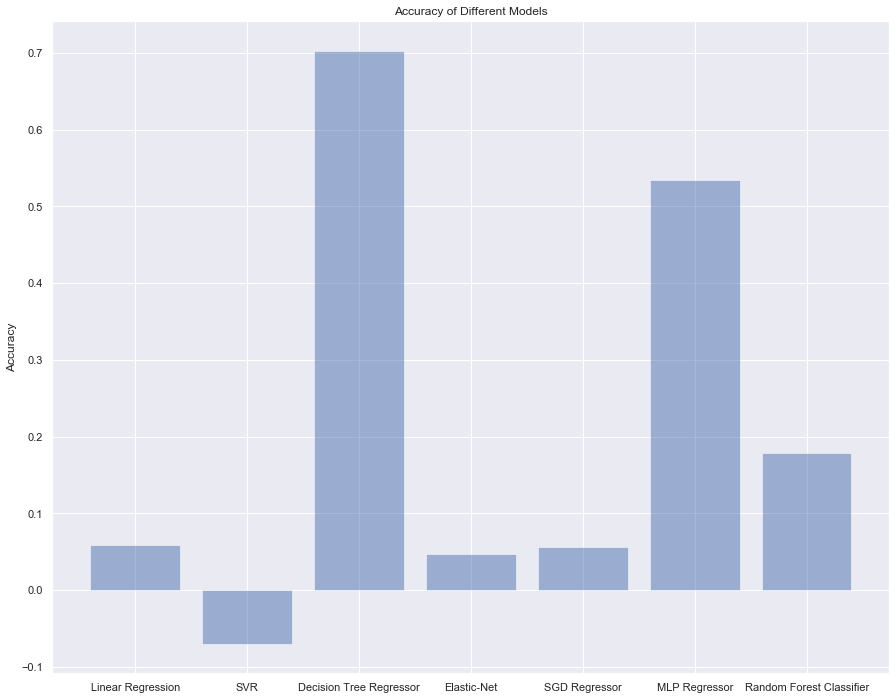

In [668]:
# Representing the accuracy of various models on a graph
objects = ('Linear Regression', 'SVR', 'Decision Tree Regressor', 'Elastic-Net', 'SGD Regressor', 'MLP Regressor', 'Random Forest Classifier')
scores = [linear_regression_score, svr_score, decision_tree_regressor_score, elastic_net_score, sgd_regressor_score, mlp_regressor_score, RandomForestClassifier_score]
plt.figure(figsize=(15, 12))
plt.bar(objects, scores, align='center', alpha=0.5)
plt.xticks(objects)
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()

---

We can observe that Decision Tree Regressor works very efficiently in predicting the traffic counts for the test data compared to remaining models.
And even MLP Regression does a decent job in predicting counts of test data with increase in number of iterations.

The type of data we trained is a hybrid data with both continuous and categorical variables. But now it is apparent that categorical variables like Ramp, Bridge, Railroad Crossing, One way and Signing in the data plays a crucial role than continuous variables like length. 

# Part 3:

## Loading related dataset (population dataset which is related to traffic volumes dataset)

In [600]:
population_data = pd.read_csv('Annual_Population_Estimates_for_New_York_State_and_Counties__Beginning_1970.csv')
population_data.head()

,FIPS Code,Geography,Year,Program Type,Population
0,36000,New York State,2019,Postcensal Population Estimate,19453561
1,36001,Albany County,2019,Postcensal Population Estimate,305506
2,36003,Allegany County,2019,Postcensal Population Estimate,46091
3,36005,Bronx County,2019,Postcensal Population Estimate,1418207
4,36007,Broome County,2019,Postcensal Population Estimate,190488


But this dataset has population of every year since 1970 till 2019 for every county in NY state but we do not need this data. We only need data which belong to year 2019 as our existing traffic dataset has the data for year 2019

In [601]:
population_data_2019 = population_data[population_data['Year'] == 2019]
population_data_2019

,FIPS Code,Geography,Year,Program Type,Population
0,36000,New York State,2019,Postcensal Population Estimate,19453561
1,36001,Albany County,2019,Postcensal Population Estimate,305506
2,36003,Allegany County,2019,Postcensal Population Estimate,46091
3,36005,Bronx County,2019,Postcensal Population Estimate,1418207
4,36007,Broome County,2019,Postcensal Population Estimate,190488
...,...,...,...,...,...
58,36115,Washington County,2019,Postcensal Population Estimate,61204
59,36117,Wayne County,2019,Postcensal Population Estimate,89918
60,36119,Westchester County,2019,Postcensal Population Estimate,967506
61,36121,Wyoming County,2019,Postcensal Population Estimate,39859


County wise population for year 2019.

---
Now we need to add 'County' to our existing traffic dataset inorder to make it compatible to the population dataset.

In [602]:
refined_data_2019['County'] = refined_data_2019['County'].apply(lambda x: x + ' County')

In [609]:
refined_data_2019

,Station ID,County,Signing,Municipality,Length,Functional Class,Ramp,Bridge,Railroad Crossing,One Way,Count
0,10001,Bronx County,Interstate,Bronx,7,11,N,Y,N,N,81839.0
1,10002,Bronx County,Interstate,Bronx,51,11,N,Y,N,N,92512.0
2,10003,Bronx County,Interstate,Bronx,63,11,N,N,N,N,140871.0
3,10004,Bronx County,US,Bronx,151,14,N,N,N,N,15198.0
4,10005,Bronx County,US,Bronx,112,14,N,Y,N,N,32254.0
...,...,...,...,...,...,...,...,...,...,...,...
60316,978036,Tioga County,Local,Nichols,77,19,N,N,N,N,518.0
60317,978037,Tioga County,Local,Barton,33,17,N,N,N,N,1679.0
60318,978516,Tioga County,Local,Owego,56,8,N,N,N,N,306.0
60319,978534,Tioga County,Local,Tioga,10,19,N,N,N,N,272.0


---
We need to drop the entry with 'Geography' = New York State from population dataset as we do not need it at all.

In [604]:
population_data_2019 = population_data_2019.drop(0)

population_data_2019

,FIPS Code,Geography,Year,Program Type,Population
1,36001,Albany County,2019,Postcensal Population Estimate,305506
2,36003,Allegany County,2019,Postcensal Population Estimate,46091
3,36005,Bronx County,2019,Postcensal Population Estimate,1418207
4,36007,Broome County,2019,Postcensal Population Estimate,190488
5,36009,Cattaraugus County,2019,Postcensal Population Estimate,76117
...,...,...,...,...,...
58,36115,Washington County,2019,Postcensal Population Estimate,61204
59,36117,Wayne County,2019,Postcensal Population Estimate,89918
60,36119,Westchester County,2019,Postcensal Population Estimate,967506
61,36121,Wyoming County,2019,Postcensal Population Estimate,39859


Changing column name from Geography to County inorder to make it compatible

In [605]:
population_data_2019 = population_data_2019.rename(columns={'Geography': 'County'})
population_data_2019


,FIPS Code,County,Year,Program Type,Population
1,36001,Albany County,2019,Postcensal Population Estimate,305506
2,36003,Allegany County,2019,Postcensal Population Estimate,46091
3,36005,Bronx County,2019,Postcensal Population Estimate,1418207
4,36007,Broome County,2019,Postcensal Population Estimate,190488
5,36009,Cattaraugus County,2019,Postcensal Population Estimate,76117
...,...,...,...,...,...
58,36115,Washington County,2019,Postcensal Population Estimate,61204
59,36117,Wayne County,2019,Postcensal Population Estimate,89918
60,36119,Westchester County,2019,Postcensal Population Estimate,967506
61,36121,Wyoming County,2019,Postcensal Population Estimate,39859


In [607]:
population_data_2019 = population_data_2019.drop(columns=['Program Type', 'FIPS Code'])
population_data_2019

,County,Year,Population
1,Albany County,2019,305506
2,Allegany County,2019,46091
3,Bronx County,2019,1418207
4,Broome County,2019,190488
5,Cattaraugus County,2019,76117
...,...,...,...
58,Washington County,2019,61204
59,Wayne County,2019,89918
60,Westchester County,2019,967506
61,Wyoming County,2019,39859


## Combining to datasets

Before combining them, we need to make them compatible as each county in traffic dataset is sub divided into many small traffic stations based on many factors. So we need to group the dataset by County and combine the traffic counts and any other meaningful variables which makes sense when compressed.

## Grouping the traffic dataset by County name

In [610]:
traffic_data_2019 = refined_data_2019.groupby(['County']).agg(Total_length = ("Length",sum),Total_traffic_count = ("Count",sum))
traffic_data_2019 = traffic_data_2019.reset_index()
traffic_data_2019


,County,Total_length,Total_traffic_count
0,Albany County,97320,9774984.0
1,Allegany County,82571,486275.0
2,Bronx County,45759,13743371.0
3,Broome County,90168,4875364.0
4,Cattaraugus County,113636,1197224.0
...,...,...,...
57,Washington County,63624,658683.0
58,Wayne County,52373,821701.0
59,Westchester County,158923,20604383.0
60,Wyoming County,43707,318586.0


## Joining both datasets

In [611]:
Combined_dataset = pd.merge(traffic_data_2019,population_data_2019,how = 'inner',on =['County'])
Combined_dataset


,County,Total_length,Total_traffic_count,Year,Population
0,Albany County,97320,9774984.0,2019,305506
1,Allegany County,82571,486275.0,2019,46091
2,Bronx County,45759,13743371.0,2019,1418207
3,Broome County,90168,4875364.0,2019,190488
4,Cattaraugus County,113636,1197224.0,2019,76117
...,...,...,...,...,...
56,Washington County,63624,658683.0,2019,61204
57,Wayne County,52373,821701.0,2019,89918
58,Westchester County,158923,20604383.0,2019,967506
59,Wyoming County,43707,318586.0,2019,39859


In [623]:

for i in list(population_data_2019['County']):
    if i not in list(Combined_dataset['County']):
        print(i)

St. Lawrence County


In [620]:
for i in list(traffic_data_2019['County']):
    if i not in list(Combined_dataset['County']):
        print(i)

Saint Lawrence County


---
A discrepancy has been noticed from both traffic and population datasets as the combined dataset is giving 61 rows instead of 62 rows(expected):
i.e., St. Lawrence County in population_data_2019 and Saint Lawrence County from traffic dataset.
So, we need to rename one of these.

---

In [626]:
traffic_data_2019 = traffic_data_2019.replace('Saint Lawrence County', 'St. Lawrence County')

In [627]:
Combined_dataset = pd.merge(traffic_data_2019,population_data_2019,how = 'inner',on =['County'])
Combined_dataset


,County,Total_length,Total_traffic_count,Year,Population
0,Albany County,97320,9774984.0,2019,305506
1,Allegany County,82571,486275.0,2019,46091
2,Bronx County,45759,13743371.0,2019,1418207
3,Broome County,90168,4875364.0,2019,190488
4,Cattaraugus County,113636,1197224.0,2019,76117
...,...,...,...,...,...
57,Washington County,63624,658683.0,2019,61204
58,Wayne County,52373,821701.0,2019,89918
59,Westchester County,158923,20604383.0,2019,967506
60,Wyoming County,43707,318586.0,2019,39859


---
Combined dataset has 62 entries each representing each County with its respective traffic volume, Length of roads and Population.

---

## 2. Choosing correlated variables from both datasets :

Variables like 'Count', 'Length' from traffic dataset may be correlated to 'population' variable from population dataset.

---

## 3. Performing Statistical analysis on finding the correlation between selected features from both datasets.

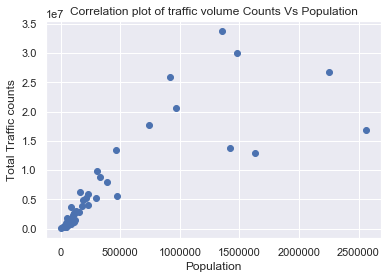

In [635]:
fig, axes = plt.subplots()

axes.scatter(Combined_dataset['Population'], Combined_dataset['Total_traffic_count'])
plt.title('Correlation plot of traffic volume Counts Vs Population')
plt.xlabel('Population')
plt.ylabel('Total Traffic counts')
plt.show()


## Total traffic counts are seen increased with an increase in population in the county.
---

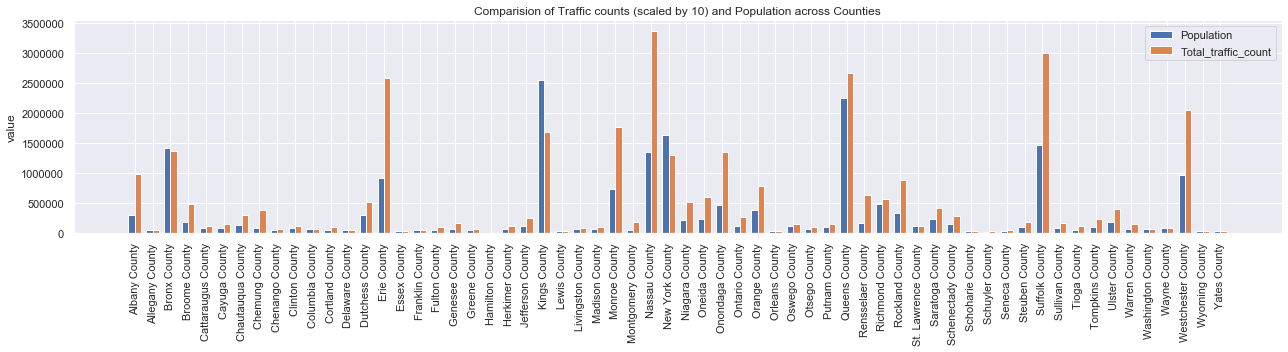

In [655]:
labels = Combined_dataset['County']
Population = np.asarray(Combined_dataset['Population'])
Total_traffic_count = np.asarray(Combined_dataset['Total_traffic_count'])/10

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(18,5))
rects1 = ax.bar(x - width/2, Population, width, label='Population')
rects2 = ax.bar(x + width/2, Total_traffic_count, width, label='Total_traffic_count')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('value')
ax.set_title('Comparision of Traffic counts (scaled by 10) and Population across Counties')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation=90)


fig.tight_layout()

plt.show()

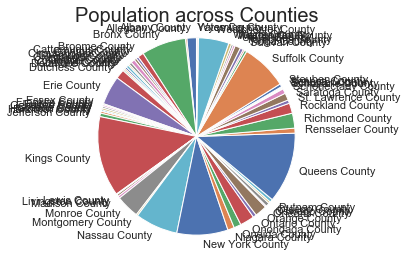

In [670]:
labels = Combined_dataset['County']
sizes = Combined_dataset['Population']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,  startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Population across Counties', fontsize = 20)
plt.show()

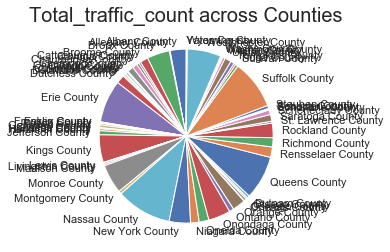

In [671]:
labels = Combined_dataset['County']
sizes = Combined_dataset['Total_traffic_count']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, startangle=90)

plt.title('Total_traffic_count across Counties', fontsize = 20)
plt.show()

## 4. Analysis from the results: 

1. We see that Total traffic counts increasing with an increase in population in the county
2. From the above County wise bar plot of population and Traffic counts, we can see that Except in Kings County Traffic volumes are very much correlated to Population of the county. More the population, more is the Traffic volume.
3. Even Pie chart supports the same above point with respect to the correlation between population and traffic counts. We see Kings county not complying with the above correlation, having less traffic counts inspite of high population.

## References:

https://data.ny.gov/Transportation/Annual-Average-Daily-Traffic-AADT-Beginning-1977/6amx-2pbv

https://www.census.gov/data/datasets/time-series/demo/popest/2010s-state-total.html

https://data.ny.gov/Government-Finance/Annual-Population-Estimates-for-New-York-State-and/krt9-ym2k/data